In [ ]:
!pip install torch
!pip install transformers
!pip install accelerate
!pip install langchain_core

In [1]:
# Setting up Flan-T5-Base LM

from transformers import pipeline, AutoTokenizer
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

import pandas as pd

torch.manual_seed(0)
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
pipe = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)


df = pd.read_csv('eval_20.tsv', header=None, sep='\t', encoding='utf-8')
num = df.shape[0]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
# Setting up MT5-Base LM
# Restart session first

import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer, pipeline
import pandas as pd

tokenizer = T5Tokenizer.from_pretrained("google/mt5-base")
model = T5ForConditionalGeneration.from_pretrained('google/mt5-base')
pipe = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    #trust_remote_code=True,
    device_map="auto",
)

df = pd.read_csv('eval_20.tsv', header=None, sep='\t', encoding='utf-8')
num = df.shape[0]

You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


In [3]:
# Setting up GPT-2 LM
# Restart session first

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import pandas as pd

model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    #trust_remote_code=True,
    device_map="auto",
)

df = pd.read_csv('eval_20.tsv', header=None, sep='\t', encoding='utf-8')
num = df.shape[0]

In [6]:
# One-shot transfer in-context learning

import pandas as pd

j = 1
df = pd.read_csv('eval_20.tsv', header=None, sep='\t', encoding='utf-8')
num = df.shape[0]
for i in range(num):
  sentence = str(df[0][i])
  prompt = f"""Rewrite only the text in between the @ symbols for the input sentence.
  Sentence: You should @ probably close up shop @ for a few days.
  Rewritten: You should @ shut down the shop @ for a few days.
  Sentence: {sentence}
  Rewritten:"""

  sequences = pipe(
      prompt,
      do_sample=True,
      max_new_tokens=60,
      #top_k=40,
  )

  for seq in sequences:
      generated_text = seq['generated_text']
      lines = generated_text.strip().split("\n")
      generated_text = sequences[0]['generated_text'].split('Rewritten:')[-1].strip()
      print(f"Result {j}:\nSentence: {sentence}\nRewritten: {generated_text}")
      j += 1

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 1:
Sentence: Your @ flagrant disregard for rules has become @ unacceptable.
Rewritten: Please consider not changing what has been left by @ and continue to use it until the end.
 Note: To learn more about how to use @ in your own sentences, check out the post below. -Ed

The above examples are the first two sentences, as defined on the wiki.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 2:
Sentence: The @ journey was long and arduous @ , but rewarding.
Rewritten: You should @ shut down the shop @ for a few days.
 http://www.reddit.com/message/compose/comments/44s7l6/welcome_to_raspberry_brewed_brewery/


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 3:
Sentence: We must @ endeavor towards a brighter tomorrow @ for our children.
Rewritten: For our children @ we need to clean up our @ offices.
  I think the above sentence is a lot of reading, so I hope it's not too long that a reader feels obliged to share this. My goal is to do this one each day, just to keep readers interested at the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 4:
Sentence: The @ sun was setting over the horizon @ as we watched.
Rewritten: Your @ meals are ready to go!


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 5:
Sentence: You @ have got to learn how to manage your @ finances better.
Rewritten: You should @ put in a few days to learn how to manage your @ finances better.
 Sentence: You should @ put in a few days to learn how to manage your @ finances better.
 Sentence: You should @ put in the time to get a little better @.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 6:
Sentence: The @ students eagerly awaited their results @ after the exam.
Rewritten: No new info will be added to your test paper. Any changes will take ~30 seconds and will be final. ~300 MB
1. Read the test paper. 2. Next test for 1 month. 3. Now you can test and review your new results for a whole month.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 7:
Sentence: The @ book was a captivating read @ from start to finish.
Rewritten: You should @ keep trying until a new sentence @ is written.
 Sentence: This was a fun read @ from the start @ so you should @ make sure you don't end up


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 8:
Sentence: She @ found solace in the pages @ of her favorite book.
Rewritten: "I, Lisa, am your best friend" (She really wrote that on paper and pencil); "I, Lisa


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 9:
Sentence: The @ performance was a triumphant achievement @ for the band.
Rewritten: You should @ shut down the shop @ for a few days.
  Sentence: You should @ shut down the shop @ for a few days.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 10:
Sentence: We must @ work together as a team @ to achieve our goals.
Rewritten: There's a good


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 11:
Sentence: His @ actions spoke louder than words @ during the crisis.
Rewritten: Post: After 4 days you could # put your money into something new if the # was important!
 Sentence: The most important thing is to stop tweeting to other people @. After this post you should @ have your account terminated. The rest is to wait for the rest of your team


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 12:
Sentence: The @ team played with determination @ to win the championship.
Rewritten: The time has come to finally do it.
  Sentence: @ had a nice walk through the town @ as #1. I would love to see you again @ again @ for the rest of your life.
  Sentence: Please leave the @ club for another @ chance @ that


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 13:
Sentence: The new restaurant @ features popular local @ cuisine.
Rewritten: Let a few of @ #2 Chef's friends @ do


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 14:
Sentence: That speech @ represented a motivational masterpiece that @ energized the audience.
Rewritten: That speech @ represented a powerful motivational speaker that


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 15:
Sentence: The book @ provided profound insights into @ the human condition.
Rewritten: You shouldn't waste the money of a successful PR@ for a short period of time.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 16:
Sentence: That incident @ was an unfortunate and regrettable @ mistake.
Rewritten: You should @ return to the shop @ if @ will be @ done


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 17:
Sentence: Her @ unwavering commitment to excellence @ is truly remarkable.
Rewritten: Her @ unwavering commitment to excellence @ is truly remarkable.
 Sentence: You should @ not be involved with the development and design of any email services @.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 18:
Sentence: You @ seem to fundamentally misunderstand @ the core issue.
Rewritten: To avoid further issues with @ the editor in this project, you should @ at no cost:
  Send email about new drafts @ and/or send your thoughts and


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 19:
Sentence: We @ must promptly expand the variety of our @ product offerings.
Rewritten: I @ will give you a list of projects you have been working
Result 20:
Sentence: In the @ midst of turmoil and confusion @ , she found her inner peace.
Rewritten: She found her peace, where all would be right except one moment like this:
   @ @ @_ @
  @ @ @ [2:53 PM] a_a._b._b._e._ _c._d._e._ _____ ___ _ _ ____ ___


In [7]:
# Few-shot transfer in-context learning

j = 1
for i in range(num):
  sentence = str(df[0][i])
  prompt = f"""Given an input sentence, rewrite only the text in between the @ symbols.
  Sentence: It @ sucks that you got caught, @ but it's not my fault.
  Rewritten: It @ is too bad you were exposed, @ but it's not my fault.
  Sentence: The @ signal on this phone is @ total crap.
  Rewritten: The @ cellphone connection is @ total crap.
  Sentence: This guy @ is meticulous in both planning @ and execution.
  Rewritten: This guy @ is diligent when it comes to preparation @ and execution.
  Sentence: Your daughter @ has more brains than @ you.
  Rewritten: Your daughter @ makes more sense than @ you.
  Sentence: She @ deserves worse than this @ for what she did.
  Rewritten: She @ deserves even more punishment @ for what she did.
  Sentence: {sentence}
  Rewritten:"""

  sequences = pipe(
      prompt,
      do_sample=True,
      max_new_tokens=60,
  )

  for seq in sequences:
      generated_text = seq['generated_text']
      lines = generated_text.strip().split("\n")
      generated_text = sequences[0]['generated_text'].split('Rewritten:')[-1].strip()
      print(f"Result {j}:\nSentence: {sentence}\nRewritten: {generated_text}")
      j += 1

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 1:
Sentence: Your @ flagrant disregard for rules has become @ unacceptable.
Rewritten: You have an @ attitude while trying to do something productive. (the only person you are doing an act of support is your wife)
 Sentence: I @ see what you're doing trying @ to ruin your life but not know. (at the end of the line you can't say the


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 2:
Sentence: The @ journey was long and arduous @ , but rewarding.
Rewritten: I would say your father was like any other father: calm, collected, smart. He would tell me who I was meant to be, where I should go. He would help me stay motivated. He would


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 3:
Sentence: We must @ endeavor towards a brighter tomorrow @ for our children.
Rewritten: The @ you can now be @ protected from this nightmare.
  Sentence: This is @ my worst nightmare.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 4:
Sentence: The @ sun was setting over the horizon @ as we watched.
Rewritten: This email was sent to a friend, @ while we listened to it.
  Sentence: This email was sent to a friend,@ while we listened to it.
  Sentence: This message was delivered @ to


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 5:
Sentence: You @ have got to learn how to manage your @ finances better.
Rewritten: You @ have got to learn how to manage your finances better.
 Sentence: You @ know how to manage your finances properly (i.e. how to put those funds into account) @ and you @ know how to manage your finances (without making it impossible for you to get the money


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 6:
Sentence: The @ students eagerly awaited their results @ after the exam.
Rewritten: The students eagerly awaited their results @ after the exam.
  Sentence: You @ didn't know they were in line for the test @ while they were waiting for the other one @.
  Sentence: You @ didn't know they were in line for the test @ while they were


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 7:
Sentence: The @ book was a captivating read @ from start to finish.
Rewritten: My husband @ is a super smart guy.
 Sentence: I was caught up when an unknown person entered my life @


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 8:
Sentence: She @ found solace in the pages @ of her favorite book.
Rewritten: Her friends @ made her have more joy.
  Sentence: One of those nice, simple sentences that can make you cry more.
Sentence: Another nice, simple sentence that can make you think less.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 9:
Sentence: The @ performance was a triumphant achievement @ for the band.
Rewritten: The performance was poor.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 10:
Sentence: We must @ work together as a team @ to achieve our goals.
Rewritten: We must work together as a team to achieve our goals.
 Sentence: @ it is time we should make a plan@ that we can implement soon.
 Sentence: We must @ make a plan@ that we can implement soon.
Sentence: @ we should implement @ to work


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 11:
Sentence: His @ actions spoke louder than words @ during the crisis.
Rewritten: With his tweets, his tweet had a significant impact.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 12:
Sentence: The @ team played with determination @ to win the championship.
Rewritten: What is her excuse for a phone call? It's too late, it's already too late.
  Sentence: In other words, when you want to call her @, she calls her @ because she likes


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 13:
Sentence: The new restaurant @ features popular local @ cuisine.
Rewritten: 


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 14:
Sentence: That speech @ represented a motivational masterpiece that @ energized the audience.
Rewritten: What a great performance!

The above script also lists 2 other methods, that can be used for all of the inputs and outputs of this method, if


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 15:
Sentence: The book @ provided profound insights into @ the human condition.
Rewritten: Your book @ is likely much better than a novel.
 sentences @ are broken up into sentences.
 sentences @ are broken up into sentences. sentences @ are


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 16:
Sentence: That incident @ was an unfortunate and regrettable @ mistake.
Rewritten: That incident @ was the right thing to do.
  Sentence: This idiot @ forgot to be careful when there's an extra person near him, @ even though you are making an excellent choice.
  Sentence: This idiot @ forgot to be clever with @ as well.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 17:
Sentence: Her @ unwavering commitment to excellence @ is truly remarkable.
Rewritten: Your daughter @ is so smart @ that she can learn the right things about your life.
  Rewritten


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 18:
Sentence: You @ seem to fundamentally misunderstand @ the core issue.
Rewritten: No I didn't see that.
  Sentence:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Result 19:
Sentence: We @ must promptly expand the variety of our @ product offerings.
Rewritten: We can implement many types of @ devices to cater for the needs of men.
  Sentence: We can @ extend the horizons of our @ devices.
 The second parameter of the
Result 20:
Sentence: In the @ midst of turmoil and confusion @ , she found her inner peace.
Rewritten: it was @ the time for us to make fun of each other.
  Sentence


In [ ]:
# Few-Shot transfer testing one line at a time

prompt = """Rewrite the text in between the @ symbols for the last sentence.
Sentence: It @ sucks that you got caught, @ but it's not my fault.
Rewritten: It @ is too bad you were exposed, @ but it's not my fault.
Sentence: You @ got to demonstrate dominance @ or they'll eat you alive.
Rewritten: You @ have to show them who the master is, @ or they'll eat you alive.
Sentence: This guy @ is meticulous in both planning @ and execution.
Rewritten: This guy @ is diligent when it comes to preparation @ and execution.
Sentence: Your daughter @ has more brains than @ you.
Rewritten: Your daughter @ makes more sense than @ you.
Sentence: The prime minister of Malaysia @ had an attempt on his life @ by Derek Zoolander.
Rewritten: The prime minister of Malaysia @ was almost assassinated @ by Derek Zoolander.
Sentence: His @ actions spoke louder than words @ during the crisis.
Rewritten:"""

sequences = pipe(
    prompt,
    do_sample=True,
    max_new_tokens=100,
)

for seq in sequences:
    print(f"Result: {seq['generated_text']}")

Result: His @ actions were more loud than words @ during the crisis.


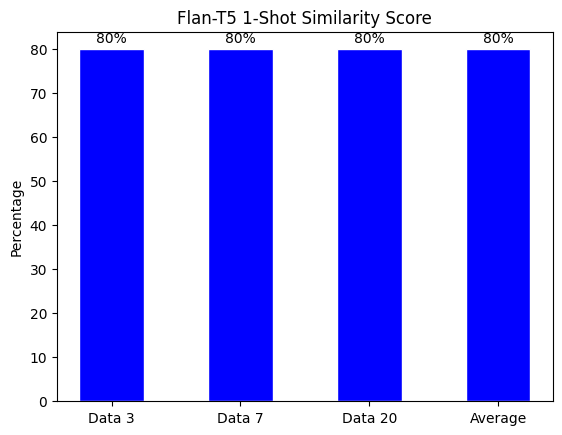

In [11]:
# Plot for Flan-T5-Base 1-Shot

import matplotlib.pyplot as plt
import numpy as np

# Data
data = {'Data 3': 4/5, 'Data 7': 4/5, 'Data 20': 4/5, 'Average': 4/5}
data_percentages = {k: v*100 for k, v in data.items()}

# Plot the bars
fig, ax = plt.subplots()
bar_width = 0.5
r = np.arange(len(data_percentages))
bars = ax.bar(r, data_percentages.values(), color='blue', width=bar_width, edgecolor='white')
ax.set_xticks(r)
ax.set_xticklabels(data_percentages.keys())
ax.set_ylabel('Percentage')
ax.set_title('Flan-T5 1-Shot Similarity Score')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

# Display the graph
plt.show()

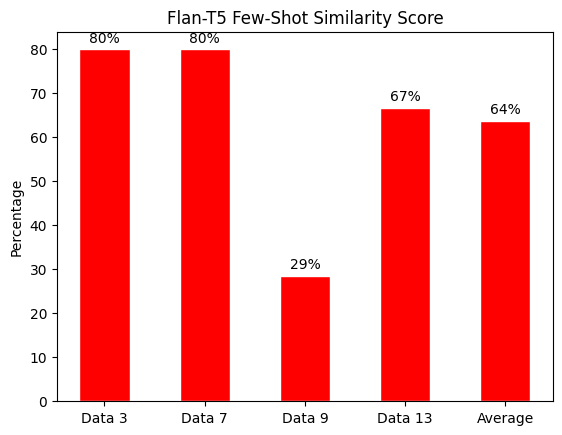

In [12]:
# Plot for Flan-T5-Base Few-Shot

import matplotlib.pyplot as plt
import numpy as np

# Data
data = {'Data 3': 4/5, 'Data 7': 4/5, 'Data 9': 2/7, 'Data 13': 2/3, 'Average': 67/105}
data_percentages = {k: v*100 for k, v in data.items()}

# Plot the bars
fig, ax = plt.subplots()
bar_width = 0.5
r = np.arange(len(data_percentages))
bars = ax.bar(r, data_percentages.values(), color='red', width=bar_width, edgecolor='white')
ax.set_xticks(r)
ax.set_xticklabels(data_percentages.keys())
ax.set_ylabel('Percentage')
ax.set_title('Flan-T5 Few-Shot Similarity Score')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

# Display the graph
plt.show()

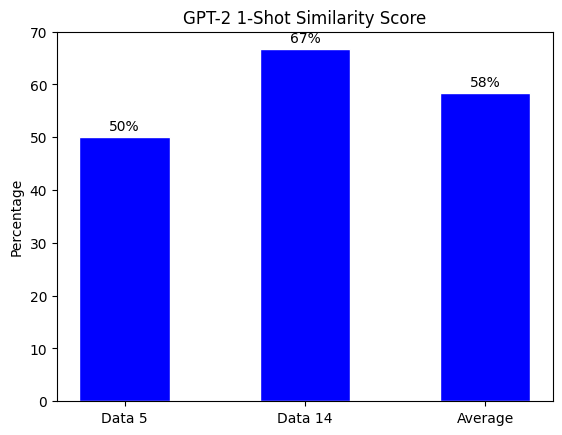

In [15]:
# Plot for GPT-2 1-Shot

import matplotlib.pyplot as plt
import numpy as np

# Data
data = {'Data 5': 6/12, 'Data 14': 4/6, 'Average': 7/12}
data_percentages = {k: v*100 for k, v in data.items()}

# Plot the bars
fig, ax = plt.subplots()
bar_width = 0.5
r = np.arange(len(data_percentages))
bars = ax.bar(r, data_percentages.values(), color='blue', width=bar_width, edgecolor='white')
ax.set_xticks(r)
ax.set_xticklabels(data_percentages.keys())
ax.set_ylabel('Percentage')
ax.set_title('GPT-2 1-Shot Similarity Score')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

# Display the graph
plt.show()